In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'


photometrydir = '/home/t.yoo/w51/catalogue/photometry/'
w51e_b3_flux = photometrydir+'w51e_b3_flux_size.fits'
w51n_b3_flux = photometrydir+'w51n_b3_flux_size.fits'
w51e_b6_flux = photometrydir+'w51e_b6_flux_size.fits'
w51n_b6_flux = photometrydir+'w51n_b6_flux_size.fits'
w51e_b6_conv_flux = photometrydir+'w51e_b6_conv_flux_size.fits'
w51n_b6_conv_flux = photometrydir+'w51n_b6_conv_flux_size.fits'





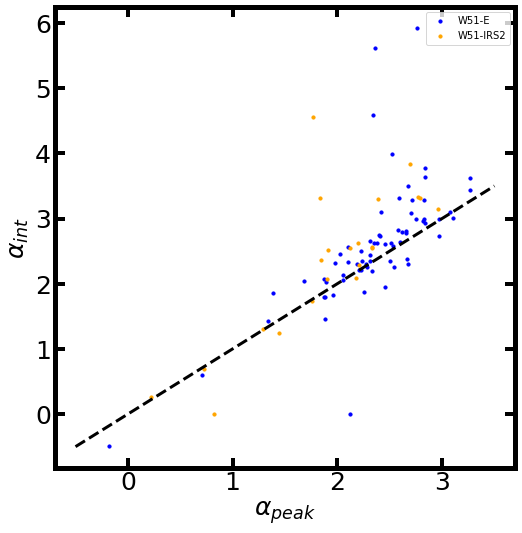

In [4]:
from astropy.table import Table
import matplotlib as mpl

plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)


def cen_freq(center, delta ,alpha=2):
    start = center-delta/2 ; end = center+delta/2
    freqarr = np.logspace(np.log10(start),np.log10(end),20)
    dfreq = freqarr[1:]-freqarr[:-1]
    dfreq = np.append(dfreq,[dfreq[-1]])
    
    integral_up = np.sum(freqarr**(alpha+1)*dfreq)
    integral_down = np.sum(freqarr**(alpha)*dfreq)
    return integral_up/integral_down
def get_alpha(freqb3, freqb6, B3flux, B6flux):
    alpha = np.log10(B3flux/B6flux)/np.log10(freqb3/freqb6)
    return alpha

hdrNB6 = fits.getheader(w51e_b6_calibrated_pbcor)  
hdrNB3 = fits.getheader(w51n_b3_tt0)     
freqb3 = cen_freq(hdrNB3['CRVAL3'],hdrNB3['CDELT4'])
freqb6 = cen_freq(hdrNB6['CRVAL4'],hdrNB6['CDELT4'])    
w51e_catalog = Table.read(w51e_matched_catalog) 
w51n_catalog = Table.read(w51n_matched_catalog) 

w51e_peak_flux_b3 = w51e_catalog['flux_peak_b3']
w51e_peak_flux_b6 = w51e_catalog['flux_peak_b6']
w51n_peak_flux_b3 = w51n_catalog['flux_peak_b3']
w51n_peak_flux_b6 = w51n_catalog['flux_peak_b6']
w51e_b3_major = w51e_b3_flux_catalog['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_major = w51e_b6_flux_catalog['deconvolved_major'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_major = w51n_b3_flux_catalog['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_major = w51n_b6_flux_catalog['deconvolved_major'].value* np.pi/180 * 5.1*1000*206265
w51e_b3_minor = w51e_b3_flux_catalog['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51e_b6_minor = w51e_b6_flux_catalog['deconvolved_minor'].value* np.pi/180 * 5.41*1000*206265
w51n_b3_minor = w51n_b3_flux_catalog['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265
w51n_b6_minor = w51n_b6_flux_catalog['deconvolved_minor'].value* np.pi/180 * 5.1*1000*206265


w51e_b3_flux_catalog = Table.read(w51e_b3_flux) 
w51n_b3_flux_catalog = Table.read(w51n_b3_flux) 
w51e_b6_flux_catalog = Table.read(w51e_b6_conv_flux) 
w51n_b6_flux_catalog = Table.read(w51n_b6_conv_flux) 


w51e_int_flux_b3 = w51e_b3_flux_catalog['flux']
w51e_int_flux_b6 = w51e_b6_flux_catalog['flux']
w51n_int_flux_b3 = w51n_b3_flux_catalog['flux']
w51n_int_flux_b6 = w51n_b6_flux_catalog['flux']

w51e_alpha_peak = get_alpha(freqb3, freqb6, w51e_peak_flux_b3, w51e_peak_flux_b6)
w51n_alpha_peak = get_alpha(freqb3, freqb6, w51n_peak_flux_b3, w51n_peak_flux_b6)

w51e_alpha_int = get_alpha(freqb3, freqb6, w51e_int_flux_b3, w51e_int_flux_b6)
w51n_alpha_int = get_alpha(freqb3, freqb6, w51n_int_flux_b3, w51n_int_flux_b6)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.15,0.15,0.8,0.8])
ax1.scatter(w51e_alpha_peak, w51e_alpha_int, c='b', s=10,label='W51-E')
ax1.scatter(w51n_alpha_peak, w51n_alpha_int, c='orange', s=10, label='W51-IRS2')
ax1.set_xlabel(r'$\alpha_{peak}$')
ax1.set_ylabel(r'$\alpha_{int}$')
ax1.plot([-0.5,3.5],[-0.5,3.5], ls='dashed',lw=3,c='k')
ax1.legend()

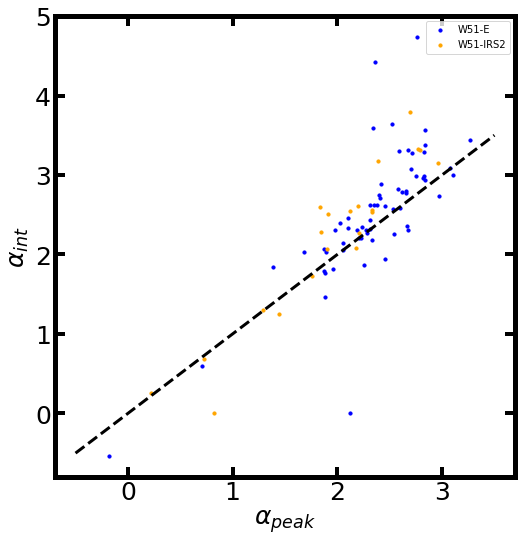

In [15]:
def flux_gaussian_multiple_apertures(flux, major, minor, rarr, rescale=False): # major, minor in FWHM, au unit
    if rescale:
        flux = flux*major/minor # making a 2d symmetric Gaussian with FWHM = FWHM_major
    
    major_sigma = major/np.sqrt(8*np.log(2))
    minor_sigma = minor/np.sqrt(8*np.log(2))
    peak_height = flux / 2 / np.pi/ major/ minor * 8 * np.log(2)
    if rescale:
        flux_rarr =2*np.pi*major_sigma**2 * peak_height * (1 - np.exp(-rarr**2/2/major_sigma**2))
    else:
        flux_rarr =2*np.pi*major_sigma*minor_sigma * peak_height * (1 - np.exp(-rarr**2/2/major_sigma/minor_sigma))

    return flux_rarr.astype('float')


w51e_flux_b3 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, 500) for flux, major, minor in zip(w51e_int_flux_b3, w51e_b3_major, w51e_b3_minor)])
w51e_flux_b6 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, 500) for flux, major, minor in zip(w51e_int_flux_b6, w51e_b6_major, w51e_b6_minor)])
w51n_flux_b3 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, 500) for flux, major, minor in zip(w51n_int_flux_b3, w51n_b3_major, w51n_b3_minor)])
w51n_flux_b6 = np.array([flux_gaussian_multiple_apertures(flux,major, minor, 500) for flux, major, minor in zip(w51n_int_flux_b6, w51n_b6_major, w51n_b6_minor)])


w51e_alpha_rescaled = get_alpha(freqb3, freqb6, w51e_flux_b3, w51e_flux_b6)
w51n_alpha_rescaled = get_alpha(freqb3, freqb6, w51n_flux_b3, w51n_flux_b6)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.15,0.15,0.8,0.8])
ax1.scatter(w51e_alpha_peak, w51e_alpha_rescaled, c='b', s=10,label='W51-E')
ax1.scatter(w51n_alpha_peak, w51n_alpha_rescaled, c='orange', s=10, label='W51-IRS2')
ax1.set_xlabel(r'$\alpha_{peak}$')
ax1.set_ylabel(r'$\alpha_{int}$')
ax1.plot([-0.5,3.5],[-0.5,3.5], ls='dashed',lw=3,c='k')
ax1.legend()


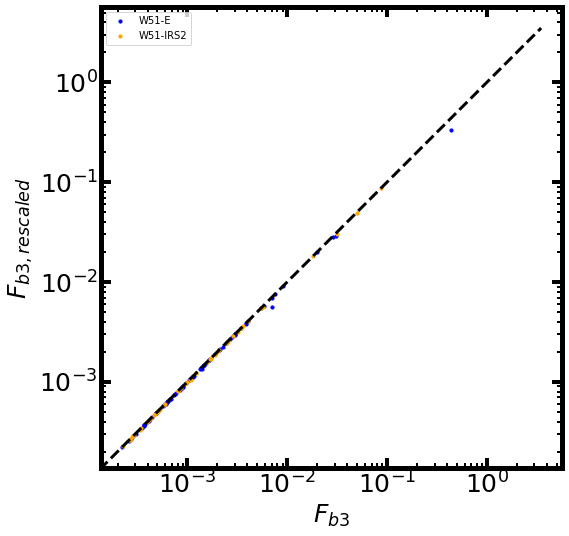

In [16]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.15,0.15,0.8,0.8])
ax1.scatter(w51e_int_flux_b3 , w51e_flux_b3, c='b', s=10,label='W51-E')
ax1.scatter(w51n_int_flux_b3 , w51n_flux_b3, c='orange', s=10, label='W51-IRS2')
ax1.set_xlabel(r'$F_{b3}$')
ax1.set_ylabel(r'$F_{b3, rescaled}$')
ax1.plot([-0.5,3.5],[-0.5,3.5], ls='dashed',lw=3,c='k')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()